## Wstępna eksploracyjna analiza danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import kagglehub
import os
from scipy.stats import pearsonr

In [3]:
path = kagglehub.dataset_download("asaniczka/52000-animation-movie-details-dataset-2024")
csv_path = os.path.join(path, "Animation_Movies.csv")
df = pd.read_csv(csv_path)

## Opis zbioru danych

In [4]:
# Rozmiar zbioru danych
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

# Liczba braków danych
missing_values = df.isnull().sum()
print("Braki danych:")
print(missing_values[missing_values > 0])

# Typy zmiennych
print("\nTypy zmiennych:")
print(df.dtypes.value_counts())
print(df.dtypes)


Liczba wierszy: 51945
Liczba kolumn: 23
Braki danych:
title                       1
release_date             2137
backdrop_path           36110
homepage                43692
imdb_id                 22393
original_title              1
overview                 6079
poster_path             14011
tagline                 47267
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

Typy zmiennych:
object     15
int64       5
float64     2
bool        1
Name: count, dtype: int64
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           o

**Kluczowe wnioski:**  
W zbiorze brakuje dużo danych, niektóre kolumny mają nawet ok. 80% braków, jednak warto zauważyć również, że braki dotyczą jedynie tak na prawdę 10 kolumn z 23. W większości w zbiorze widnieją dane typu object, najpewniej są to dane tekstowe lub daty, poza tym jest kilka zmiennych numerycznych i jedna boolowska.


## Analiza statystyczna

In [5]:
df.describe(include='all')

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
count,5.194500e+04,51944,51945.000000,51945.000000,51945,49808,5.194500e+04,51945.000000,51945,15835,...,51945,51944,45866,51945.000000,37934,4678,51945,29398,39700,33818
unique,NaN,49381,NaN,NaN,6,16893,NaN,NaN,2,15731,...,102,50318,44907,NaN,37819,4451,2649,11196,1096,617
top,NaN,Little Red Riding Hood,NaN,NaN,Released,2017-01-01,NaN,NaN,False,/7tFOLDhZqKPactVlGfdjgVmYnlu.jpg,...,en,Cinderella,An Aesop’s Film Fables cartoon.,NaN,/tVRb7CCGuru9RdG1ikGFCceuegy.jpg,animation short,Animation,ONF | NFB,United States of America,English
freq,NaN,15,NaN,NaN,51134,291,NaN,NaN,51719,17,...,28584,9,71,NaN,12,104,28393,717,12836,12005
mean,6.188122e+05,NaN,2.597083,40.395380,NaN,NaN,1.863464e+06,20.901415,NaN,NaN,...,NaN,NaN,NaN,1.886233,NaN,NaN,NaN,NaN,NaN,NaN
std,3.479748e+05,NaN,3.318748,482.705948,NaN,NaN,3.049824e+07,39.016002,NaN,NaN,...,NaN,NaN,NaN,9.700913,NaN,NaN,NaN,NaN,NaN,NaN
min,1.200000e+01,NaN,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.300810e+05,NaN,0.000000,0.000000,NaN,NaN,0.000000e+00,3.000000,NaN,NaN,...,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.119150e+05,NaN,0.000000,0.000000,NaN,NaN,0.000000e+00,7.000000,NaN,NaN,...,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.159040e+05,NaN,6.000000,2.000000,NaN,NaN,0.000000e+00,19.000000,NaN,NaN,...,NaN,NaN,NaN,0.882000,NaN,NaN,NaN,NaN,NaN,NaN


**Kluczowe wnioski:**  
Maksymalna wartość votecount wynosi 19463, podczas gdy średnia to jedynie 40.4, sugeruje to, że większość filmów w zbiorze jest mało popularna lub nie była oceniana. Średnia vote average to jedynie 2.59 na 10 (co sugeruje max), a odchylenie standardowe to 3.32, sugeruje to, że większość filmów jest oceniona poniżej 5 lub nie zostały one ocenione.

## Analiza zmiennych numerycznych

In [6]:
print(df[['adult', 'vote_average']].groupby('adult').describe())
print(df[['adult', 'vote_count']].groupby('adult').describe())
print(df[['adult', 'revenue']].groupby('adult').describe())
print(df[['adult', 'runtime']].groupby('adult').describe())
print(df[['adult', 'budget']].groupby('adult').describe())
print(df[['adult', 'popularity']].groupby('adult').describe())

      vote_average                                              
             count      mean       std  min  25%  50%  75%   max
adult                                                           
False      51719.0  2.600276  3.319712  0.0  0.0  0.0  6.0  10.0
True         226.0  1.866473  3.009010  0.0  0.0  0.0  4.0  10.0
      vote_count                                                    
           count       mean         std  min  25%  50%  75%      max
adult                                                               
False    51719.0  40.568572  483.752324  0.0  0.0  0.0  2.0  19463.0
True       226.0   0.761062    2.365584  0.0  0.0  0.0  1.0     28.0
       revenue                                                              
         count          mean           std  min  25%  50%  75%           max
adult                                                                       
False  51719.0  1.871607e+06  3.056455e+07  0.0  0.0  0.0  0.0  1.450027e+09
True     226.0  5.8318

**Kluczowe wnioski:**  
Pomimo dużej różnicy w ilości danych można zauważyć, że filmy przeznaczone dla dorosłych były dużo rzadziej oceniane niż inne filmy. Filmy przeznaczone dla dorosłych również przynosiły dużo mniejsze zyski niż pozostałe filmy.

## Analiza zmiennej jakościowej typu multilabel

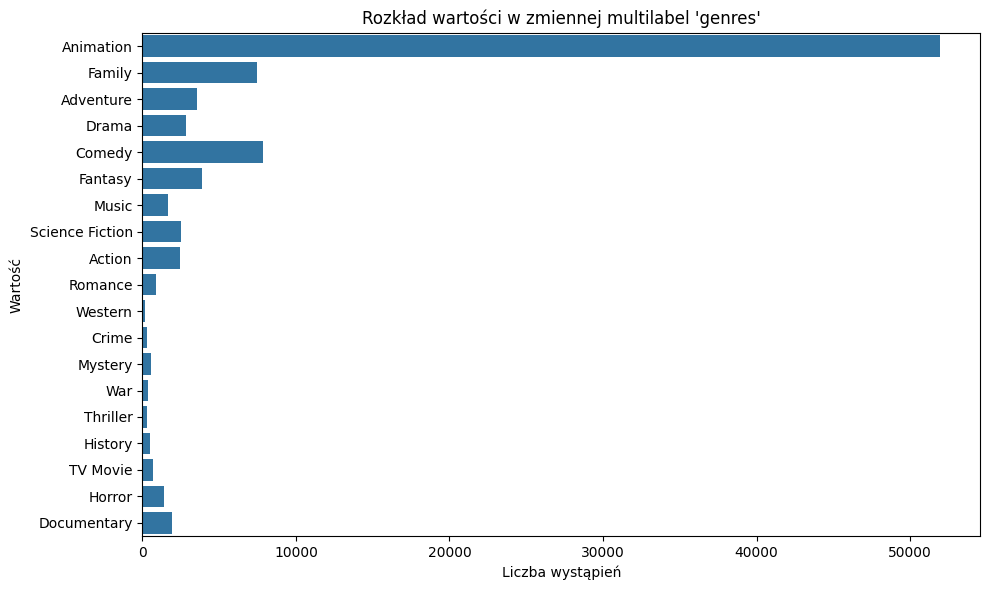

In [12]:
multilabel_series = df['genres'].dropna().apply(lambda x: x.split(','))
flat_labels = [label.strip() for sublist in multilabel_series for label in sublist]
label_counts = Counter(flat_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.values()), y=list(label_counts.keys()))
plt.xlabel("Liczba wystąpień")
plt.ylabel("Wartość")
plt.title("Rozkład wartości w zmiennej multilabel 'genres'")
plt.tight_layout()
plt.show()

**Kluczowe wnioski:**  
Najczęstszym gatunkiem dla filmów animowanych były filmy familijne i komedie. Najrzadziej były poruszane gatunki zawierające elementy akcji i sensacyjne takie jak western, kryminał, filmy wojenne, thrillery.

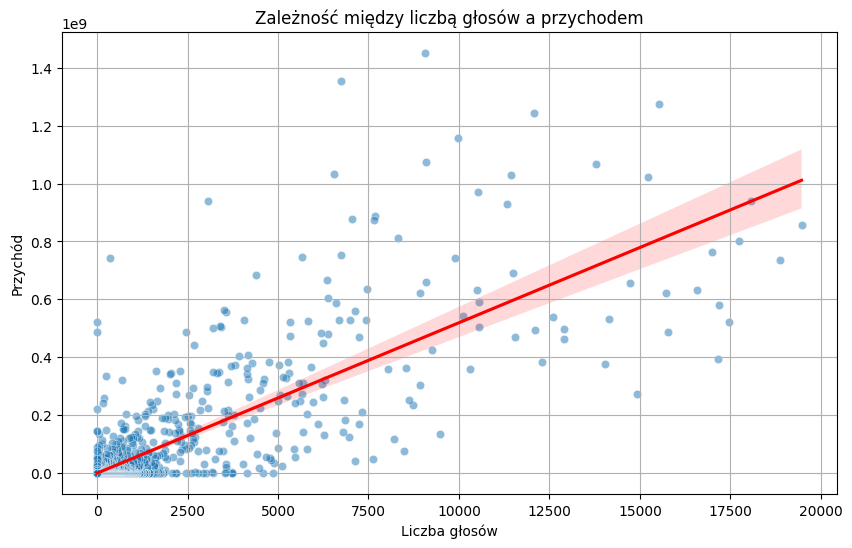

PearsonRResult(statistic=np.float64(0.8225100419904721), pvalue=np.float64(0.0))

In [8]:
df_clean = df[['vote_count', 'revenue']].dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='vote_count', y='revenue', alpha=0.5)
sns.regplot(data=df_clean, x='vote_count', y='revenue', scatter=False, color='red')
plt.title('Zależność między liczbą głosów a przychodem')
plt.xlabel('Liczba głosów')
plt.ylabel('Przychód')
plt.grid(True)
plt.show()
pearsonr(df['vote_count'], df['revenue'])

**Kluczowe wnioski:**  
Możemy zauważyć, że zmienne vote_count i revenue są ze sobą dosyć silnie skorelowane, zazwyczaj im więcej głosów otrzymał film, tym większy przychód wygenerował. Wartość korelacji Pearsona dla tych dwóch zmiennych to ok. 0.82.

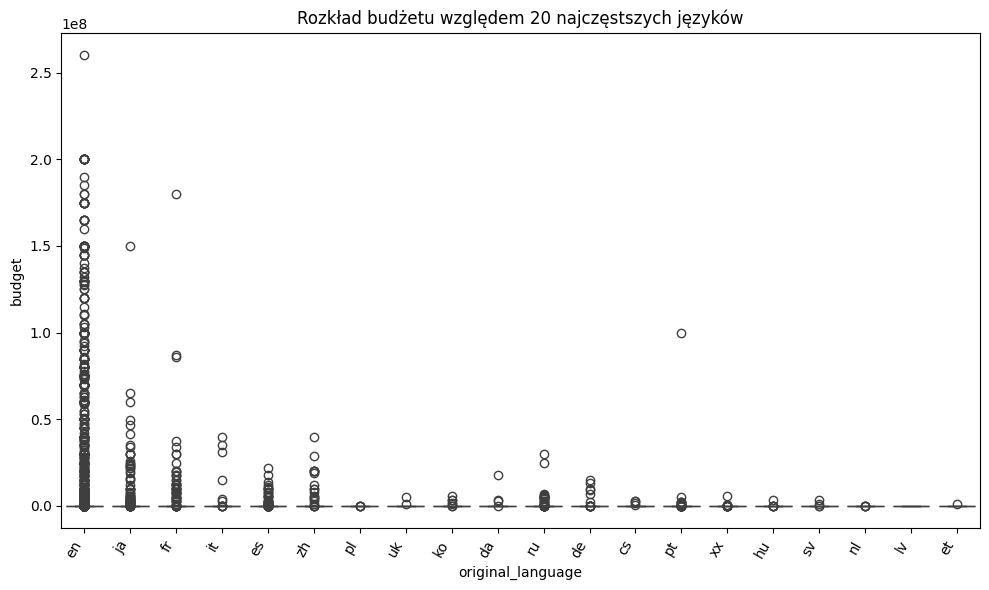

In [9]:
top_langs = df['original_language'].value_counts().nlargest(20).index
df_top = df[df['original_language'].isin(top_langs)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='original_language', y='budget', data=df_top)
plt.title("Rozkład budżetu względem 20 najczęstszych języków")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

**Kluczowe wnioski:**  
Zdecydowanie największe budżety mają animacje anglojęzyczne, a na drugim miejscu plasują się filmy japońskie. Warto zwrócić uwagę na język francuski, mimo że większość filmów ma mniejszy budżet od japońskich filmów, to mamy kilka outlierów, o stosunkowo bardzo dużym budżecie.